$\textbf{Student:}$ Carlos Daniel Fontes da Silva\
$\textbf{E-mail:}$ carlos.fontes@ee.ufcg.edu.br

# Assignment 5: Harmonics separation of an audio signal

In the file $\textit{sinal_1.wav}$ was recorded a signal composed by a sum of cosines sampled in $16\ kHz$. Make a system of FIR filters that separe this cosines in different graphics.

In [1]:
import IPython
import wave
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, ifft, fftshift, fftfreq
from scipy.io import loadmat, wavfile

In [2]:
def IdealFilter(n,ω_c1,ω_c2):
    H = np.zeros(len(n))
    for i in range(len(n)):
        if(n[i] >= ω_c1 and n[i] <= ω_c2):
            H[i] = 1
            H[len(n) - i - 1] = 1
    return H

In [3]:
def TypeIII(H, M):
    h = np.zeros(M+1)
    soma = 0
    for n in range(M+1):
        for k in range(1,int(M/2)+1):
            soma += (-1)**(k+1)*abs(H[k])*np.sin(np.pi*k*(1+2*n)/(M+1))
        h[n] = soma*2/(M+1)
        soma = 0
    return h

## 1 - Sinal original no domínio do tempo e da frequência

In [4]:
audio = wave.open('sinal_1.wav','rb')

fs      = audio.getframerate()                          # Sampling frequency
samples = audio.getnframes()                            # Number of samples
t_max   = samples/fs                                    # Audio duration

sinal_wave = audio.readframes(samples)                  # Returns the signal's values of each sample
sinal_array = np.frombuffer(sinal_wave, dtype=np.int8)  # Converts from byte to int type

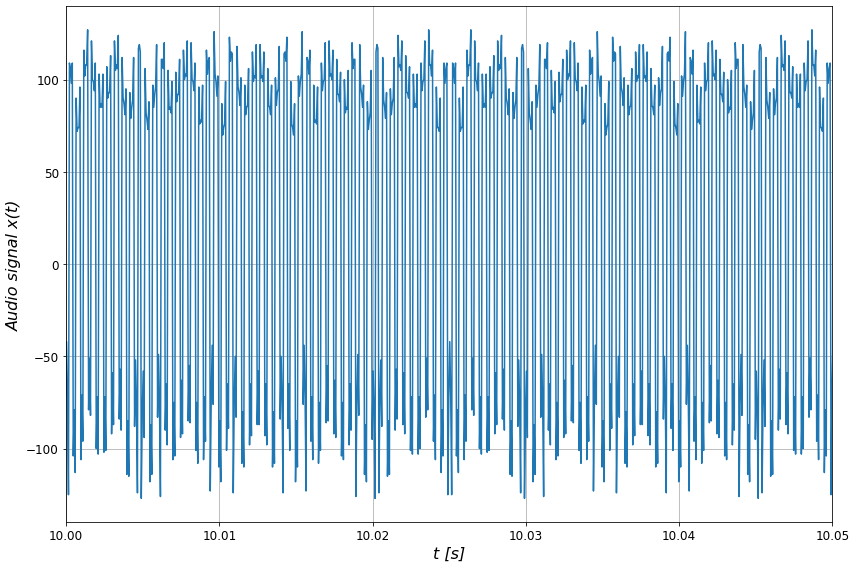

In [5]:
t = np.linspace(0, t_max, samples)

plt.figure(figsize = (12, 8))
plt.plot(t, sinal_array)
plt.xlabel('t [s]', fontsize = 16, fontstyle = 'italic')
plt.ylabel('Audio signal x(t)', fontsize = 16, fontstyle = 'italic')
plt.xlim(10.0, 10.05)
plt.tick_params(axis = 'both', labelsize = 12)
plt.grid()
plt.tight_layout()

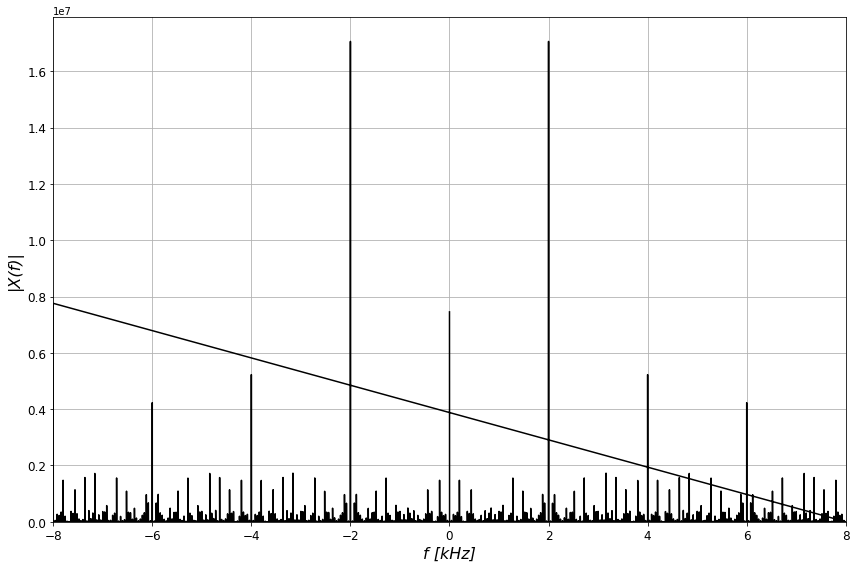

In [6]:
plt.figure(figsize = (12, 8))

f = fs*fftfreq(samples)
plt.plot(1e-3*f, abs(fft(sinal_array, samples)), 'k')

plt.xlabel('f [kHz]', fontsize = 16, fontstyle = 'italic')
plt.ylabel('|X(f)|', fontsize = 16, fontstyle = 'italic')
plt.tick_params(axis = 'both', labelsize = 12)
plt.xlim(-1e-3*fs/2, 1e-3*fs/2)
plt.ylim(0)
plt.tight_layout()
plt.grid()

In [7]:
# Sinal original
IPython.display.Audio('sinal_1.wav')

## 2 - Separação das harmônicas

In [8]:
f_c1 = np.array([1900, 3900, 5900])
f_c2 = np.array([2100, 4100, 6100])

ω_c1 = 2*np.pi*f_c1/fs
ω_c2 = 2*np.pi*f_c2/fs

M = np.array([1000, 1000, 1000])

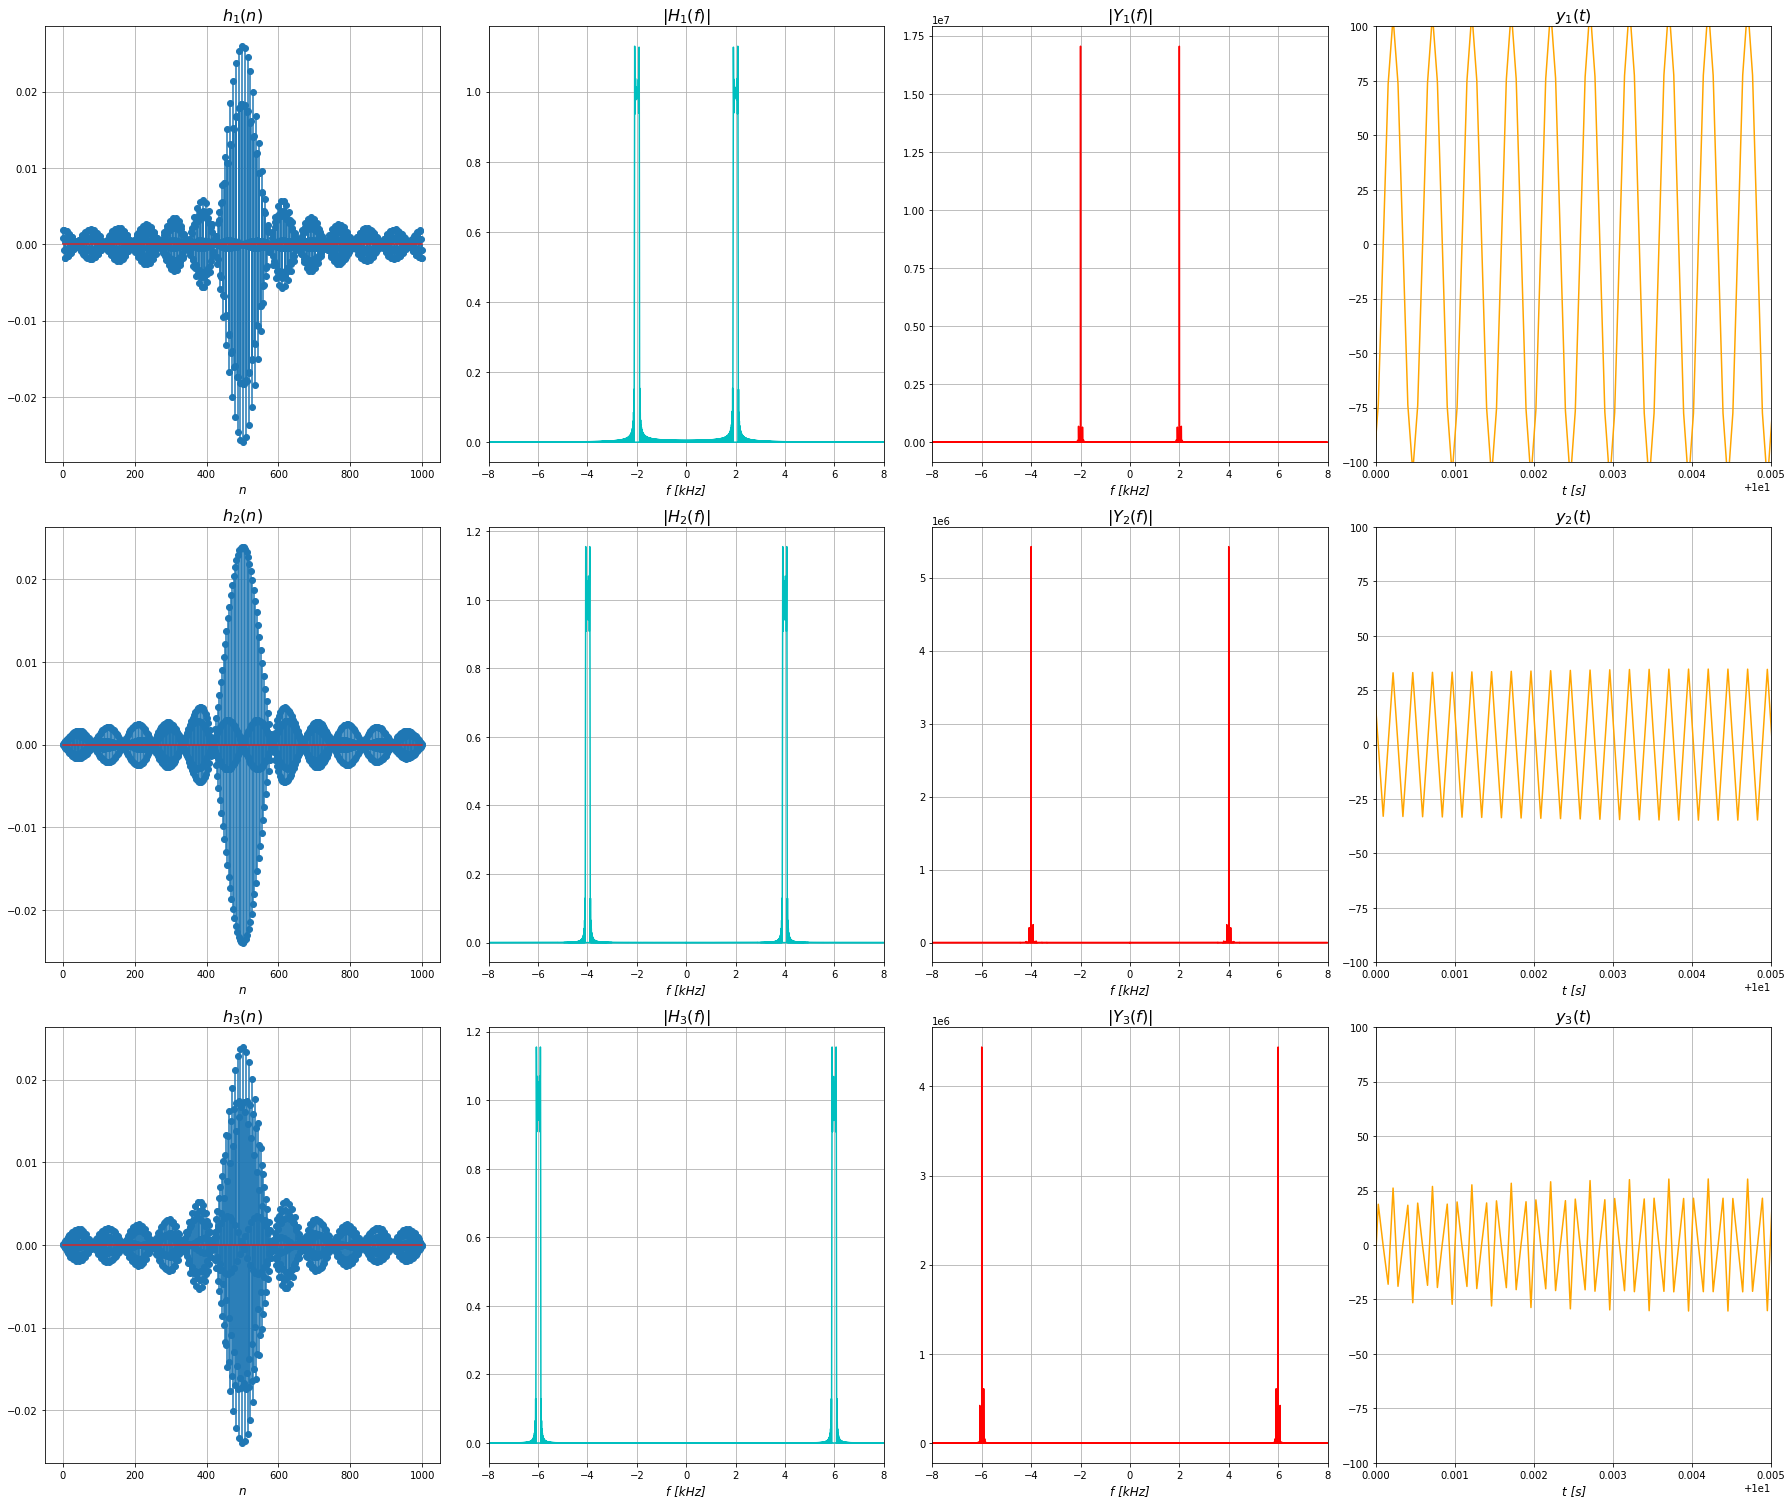

In [9]:
fig, axs = plt.subplots(len(M), 4, figsize = (25, 7*len(M)))

for i in range(len(M)):
    n = np.linspace(0, 2*np.pi, M[i])
    h = TypeIII(IdealFilter(n,ω_c1[i],ω_c2[i]), M[i])
    
    axs[i,0].stem(h)
    axs[i,0].set_xlabel('n', fontsize = 12, fontstyle = 'italic')
    axs[i,0].set_title('$h_'+str(i+1)+'(n)$', fontsize = 16, fontstyle = 'italic')
    axs[i,0].grid()
    
    T = len(sinal_array) + len(h) - 1
    f = fs*fftfreq(T)
    
    h = np.pad(h, (0, T - len(h)), 'constant')
    sinal = np.pad(sinal_array, (0, T - len(sinal_array)), 'constant')
    
    Y = (abs(fft(sinal))) * (abs(fft(h)))
    y = np.real(ifft(Y))
    t = np.linspace(0, t_max, T)
    
    axs[i,1].plot(1e-3*f, abs(fft(h)),'c')
    axs[i,1].set_xlabel('f [kHz]', fontsize = 12, fontstyle = 'italic')
    axs[i,1].set_title('$|H_'+str(i+1)+'(f)|$', fontsize = 16, fontweight = 'bold')
    axs[i,1].set_xlim(-1e-3*fs/2, 1e-3*fs/2)
    axs[i,1].grid()
    
    axs[i,2].plot(1e-3*f, abs(Y),'r')
    axs[i,2].set_xlabel('f [kHz]', fontsize = 12, fontstyle = 'italic')
    axs[i,2].set_title('$|Y_'+str(i+1)+'(f)|$', fontsize = 16, fontweight = 'bold')
    axs[i,2].set_xlim(-1e-3*fs/2, 1e-3*fs/2)
    axs[i,2].grid()
    
    axs[i,3].plot(t, y, 'orange')
    axs[i,3].set_xlabel('t [s]', fontsize = 12, fontstyle = 'italic')
    axs[i,3].set_title('$y_'+str(i+1)+'(t)$', fontsize = 16, fontweight = 'bold')
    axs[i,3].set_ylim(-100, 100)
    axs[i,3].set_xlim(10, 10.005)
    axs[i,3].grid()
    
    wavfile.write('Harm_'+str(i+1)+'.wav', int(fs), y.astype(np.float32))
    
plt.tight_layout()

In [14]:
# Harmonic of 2 kHz
IPython.display.Audio('Harm_1.wav')

In [15]:
# Harmonic of 4 kHz
IPython.display.Audio('Harm_2.wav')

In [16]:
# Harmonic of 6 kHz
IPython.display.Audio('Harm_3.wav')